In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
trainData = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform = transforms.ToTensor())

trainLoader = torch.utils.data.DataLoader(trainData, batch_size=10, shuffle=True, num_workers=1)

testData = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform = transforms.ToTensor())

testLoader = torch.utils.data.DataLoader(testData, batch_size=10, shuffle=True, num_workers=1)

torch.Size([10, 1, 28, 28])
torch.Size([10])


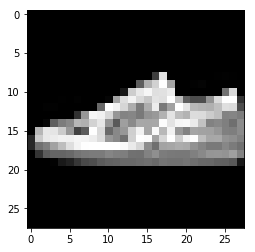

tensor(7)


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npImage = img.numpy()
    plt.imshow(npImage, cmap="gray")
    plt.show()
    
iterator = iter(trainLoader)
image, label = iterator.next()
print(image.shape)
print(label.shape)

imshow(image[1,0,:,:])
print(label[1])

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 32, 5)
        self.conv3 = nn.Conv2d(32, 128, 3)
        self.fc1 = nn.Linear(128*1*1, 84)
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        x = F.max_pool2d(torch.tanh(self.conv2(x)), 2)
        x = F.max_pool2d(torch.tanh(self.conv3(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
params = list(net.parameters())
print(len(params))
print(params[2].size())

10
torch.Size([32, 8, 5, 5])


In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [14]:
for epoch in range (10):
    
    lossTotal = 0.0
    
    for i,data in enumerate(trainLoader, 0):
        images, labels = data
                
        optimizer.zero_grad()
        
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        lossTotal += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, lossTotal / 2000))
            lossTotal = 0.0
            
print("trained")

[1,  2000] loss: 0.279
[1,  4000] loss: 0.290
[1,  6000] loss: 0.292
[2,  2000] loss: 0.257
[2,  4000] loss: 0.266
[2,  6000] loss: 0.273
[3,  2000] loss: 0.240
[3,  4000] loss: 0.247
[3,  6000] loss: 0.253
[4,  2000] loss: 0.221
[4,  4000] loss: 0.238
[4,  6000] loss: 0.241
[5,  2000] loss: 0.212
[5,  4000] loss: 0.232
[5,  6000] loss: 0.221
[6,  2000] loss: 0.200
[6,  4000] loss: 0.216
[6,  6000] loss: 0.214
[7,  2000] loss: 0.194
[7,  4000] loss: 0.198
[7,  6000] loss: 0.208
[8,  2000] loss: 0.182
[8,  4000] loss: 0.196
[8,  6000] loss: 0.204
[9,  2000] loss: 0.175
[9,  4000] loss: 0.187
[9,  6000] loss: 0.193
[10,  2000] loss: 0.172
[10,  4000] loss: 0.181
[10,  6000] loss: 0.188
trained


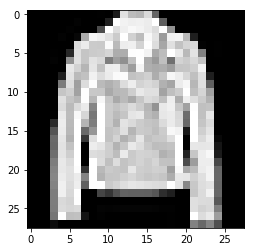

tensor(4)




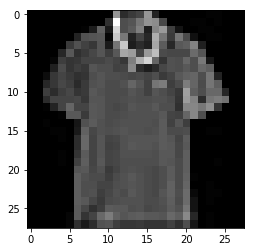

tensor(0)




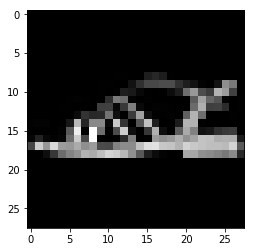

tensor(5)




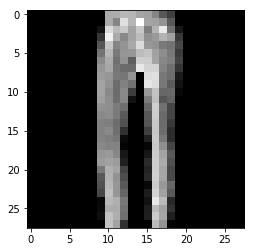

tensor(1)




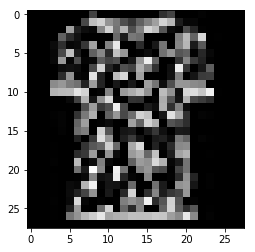

tensor(6)




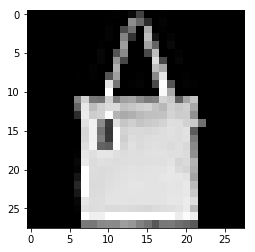

tensor(8)




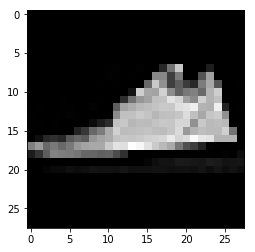

tensor(7)




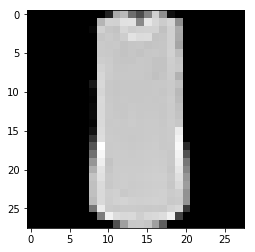

tensor(0)




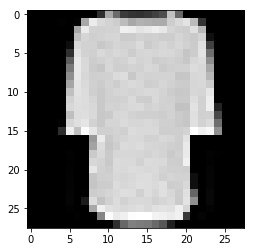

tensor(2)




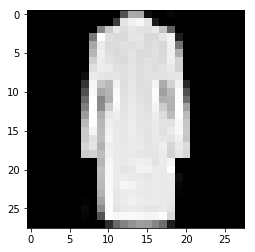

tensor(3)




In [25]:
testIterator = iter(testLoader)
images, labels = testIterator.next()

for i in range (images.shape[0]):
    imshow(images[i,0,:,:])
    print(labels[i])
    print("\n")


In [20]:
outputs = net(images)
_, predVal = torch.max(outputs, 1)

print("Predicted Values : ", " ".join('%5s' % predVal[j] for j in range(10)))

Predicted Values :  tensor(1) tensor(2) tensor(8) tensor(0) tensor(8) tensor(4) tensor(3) tensor(4) tensor(1) tensor(7)


In [21]:
true = 0
total = 0

with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images)
        _, predVal = torch.max(outputs.data, 1)
        total = labels.size(0)
        true += (predVal == labels).sum().item()
        
print("Accuracy : " + str((100*true)/total))

Accuracy : 88990.0
